## Experiment 3 ML Model with new feature

In [2]:
from action.core import load_action
from metrics.evaluation import evaluate_using_bootstrap
from model.mlmodel import *
from preprocessor.features import *
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import json
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
PATH = "data/actions/"
gameids = ["0021500149", "0021500197", "0021500270", "0021500316",
           "0021500350", "0021500428", "0021500476", "0021500582"]

In [4]:
_0021500149 = json.load(open(PATH + gameids[0] + ".json"))
_0021500197 = json.load(open(PATH + gameids[1] + ".json"))
_0021500270 = json.load(open(PATH + gameids[2] + ".json"))
_0021500316 = json.load(open(PATH + gameids[3] + ".json"))
_0021500350 = json.load(open(PATH + gameids[4] + ".json"))
_0021500428 = json.load(open(PATH + gameids[5] + ".json"))
_0021500476 = json.load(open(PATH + gameids[6] + ".json"))
_0021500582 = json.load(open(PATH + gameids[7] + ".json")) 

In [5]:
ekeys = [_0021500149, _0021500197, _0021500270, _0021500316, _0021500350, _0021500428, _0021500476, _0021500582]

In [6]:
X = []
y = []
dtw = []
dist = []
canon = []
dist_canon = []
entp = []
tcanon = []
pdist = []
speed_def = []
speed_off = []
area = []

print "LOADING ACTIONS..."
for ekey in ekeys:
    for eid in sorted(ekey.keys()):
        try:
            gid = ekey[eid]['gameid']
            action = load_action(gid, eid)
            _dtw  = get_DTW(action)
            _dist = get_mean_distance(action)
            _canon = get_mean_distance_from_canonical_position(action)
            _dist_canon = get_diff_canon_vs_matchup(action)
            _entp = get_entropy(action)
            _tcanon = get_time_defending(action)
            _pdist = get_distance_from_post(action)
            _speed_def = get_average_speed_defense(action)
            _speed_off = get_average_speed_offense(action)
            _area = get_excess_voronoi_area(action)
            dtw.append(_dtw)
            canon.append(_canon)
            dist.append(_dist)
            dist_canon.append(_dist_canon)
            entp.append(_entp)
            tcanon.append(_tcanon)
            pdist.append(_pdist)
            speed_def.append(_speed_def)
            speed_off.append(_speed_off)
            area.append(_area)
            y.append(int(action.label))
        except Exception as e:
            print gid + " | " + str(eid) + " -> " + str(e)
y = np.array(y)
print "DONE"

LOADING ACTIONS...
0021500582 | 71 -> 2
DONE


In [6]:
zone_dtw = [dtw[index] for index, value in enumerate(y) if value == -1]
man_dtw = [dtw[index] for index, value in enumerate(y) if value == 1]

zone_canon = [canon[index] for index, value in enumerate(y) if value == -1]
man_canon = [canon[index] for index, value in enumerate(y) if value == 1]

zone_dist = [dist[index] for index, value in enumerate(y) if value == -1]
man_dist = [dist[index] for index, value in enumerate(y) if value == 1]

zone_dist_canon = [dist_canon[index] for index, value in enumerate(y) if value == -1]
man_dist_canon = [dist_canon[index] for index, value in enumerate(y) if value == 1]

zone_entp = [entp[index] for index, value in enumerate(y) if value == -1]
man_entp = [entp[index] for index, value in enumerate(y) if value == 1]

zone_tcanon = [tcanon[index] for index, value in enumerate(y) if value == -1]
man_tcanon = [tcanon[index] for index, value in enumerate(y) if value == 1]

zone_pdist = [pdist[index] for index, value in enumerate(y) if value == -1]
man_pdist = [pdist[index] for index, value in enumerate(y) if value == 1]

zone_speed_def = [speed_def[index] for index, value in enumerate(y) if value == -1]
man_speed_def = [speed_def[index] for index, value in enumerate(y) if value == 1]

zone_speed_off = [speed_off[index] for index, value in enumerate(y) if value == -1]
man_speed_off = [speed_off[index] for index, value in enumerate(y) if value == 1]

zone_area = [area[index] for index, value in enumerate(y) if value == -1]
man_area = [area[index] for index, value in enumerate(y) if value == 1]

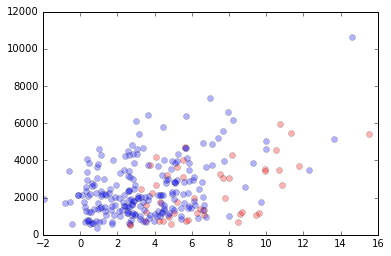

man: 218
zone: 48


In [9]:
plt.plot(np.mean(zone_area, axis=1), np.mean(zone_dtw, axis=1), 'ro', alpha=0.3)
plt.plot(np.mean(man_area, axis=1), np.mean(man_dtw, axis=1), 'bo', alpha=0.3)
plt.show()
zone_len = 0
man_len = 0

for value in y:
    if value == -1:
        zone_len += 1
    else:
        man_len += 1

print "man: " + str(man_len)
print "zone: " + str(zone_len)

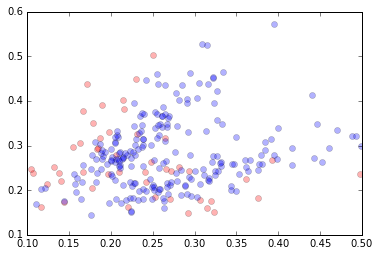

In [20]:
plt.plot(np.mean(zone_speed_def, axis=1), np.mean(zone_speed_off, axis=1), 'ro', alpha=0.3)
plt.plot(np.mean(man_speed_def, axis=1), np.mean(man_speed_off, axis=1), 'bo', alpha=0.3)
plt.show()

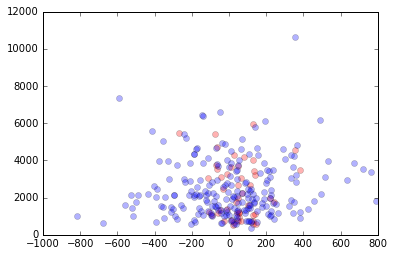

In [18]:
plt.plot([z[1] for z in zone_area], np.mean(zone_dtw, axis=1), 'ro', alpha=0.3)
plt.plot([m[1] for m in man_area], np.mean(man_dtw, axis=1),'bo', alpha=0.3)
plt.show()

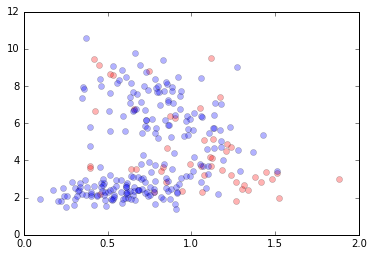

In [50]:
plt.plot(np.mean(zone_entp, axis=1), np.mean(zone_tcanon, axis=1), 'ro', alpha=0.3)
plt.plot(np.mean(man_entp, axis=1), np.mean(man_tcanon, axis=1), 'bo', alpha=0.3)
plt.show()

In [10]:
# All individual data
a0 = [a[0] for a in area]
a1 = [a[1] for a in area]
a2 = [a[2] for a in area]
a3 = [a[3] for a in area]
a4 = [a[4] for a in area]


X = np.matrix(preprocessing.scale(zip(
                                      [player[0] for player in dist],
                                      [player[1] for player in dist],
                                      [player[2] for player in dist],
                                      [player[3] for player in dist],
                                      [player[4] for player in dist],

                                      [player[0] for player in canon],
                                      [player[1] for player in canon],
                                      [player[2] for player in canon],
                                      [player[3] for player in canon],
                                      [player[4] for player in canon],

                                      [player[0] for player in dist_canon],
                                      [player[1] for player in dist_canon],
                                      [player[2] for player in dist_canon],
                                      [player[3] for player in dist_canon],
                                      [player[4] for player in dist_canon],


                                      [player[0] for player in entp],
                                      [player[1] for player in entp],
                                      [player[2] for player in entp],
                                      [player[3] for player in entp],
                                      [player[4] for player in entp],

                                      [player[0] for player in tcanon],
                                      [player[1] for player in tcanon],
                                      [player[2] for player in tcanon],
                                      [player[3] for player in tcanon],
                                      [player[4] for player in tcanon],

                                      [player[0] for player in pdist],
                                      [player[1] for player in pdist],
                                      [player[2] for player in pdist],
                                      [player[3] for player in pdist],
                                      [player[4] for player in pdist],

                                      [player[0] for player in speed_def],
                                      [player[1] for player in speed_def],
                                      [player[2] for player in speed_def],
                                      [player[3] for player in speed_def],
                                      [player[4] for player in speed_def],

                                      [player[0] for player in speed_off],
                                      [player[1] for player in speed_off],
                                      [player[2] for player in speed_off],
                                      [player[3] for player in speed_off],
                                      [player[4] for player in speed_off],

                                     a0, a1, a2, a3, a4
                )))


dist_str = "dist1, dist2, dist3, dist4, dist5, "
canon_str = "canon1, canon2, canon3, canon4, canon5, "
dist_canon_str = "dist-canon1, dist-canon2, dist-canon3, dist-canon4, dist-canon5, "
entp_str = "entropy1, entropy2, entropy3, entropy4, entropy5, "
tcanon_str = "time_def1, time_def2, time_def3, time_def4, time_def5, "
pdist_str = "post_dist1, post_dist2, post_dist3, post_dist4, post_dist5, "
speed_def_str = "veloc_def1, veloc_def2, veloc_def3, veloc_def4, veloc_def5, "
speed_off_str = "veloc_off1, veloc_off2, veloc_off3, veloc_off4, veloc_off5, "
area_str = "area1, area2, area3, area4, area5, "

np.savetxt("data/datasetindividual.csv", [xlist + [y[i]] for i, xlist in enumerate(X.tolist())], delimiter=",",
           header=dist_str + canon_str + dist_canon_str + entp_str + tcanon_str + pdist_str + speed_def_str + speed_off_str + area_str)

In [62]:
# X = np.matrix(preprocessing.scale(zip(np.mean(dist, axis=1), np.median(canon, axis=1))))
a0 = [a[0] for a in area]
a1 = [a[1] for a in area]
a2 = [a[2] for a in area]
a3 = [a[3] for a in area]
a4 = [a[4] for a in area]

X = np.matrix(preprocessing.scale(zip(
                                      np.mean(dist, axis=1),
                                      np.mean(canon, axis=1),
                                      np.mean(dist_canon, axis=1),
                                      np.mean(entp, axis=1),
                                      np.mean(tcanon, axis=1),
                                      np.mean(pdist, axis=1),
                                      np.mean(speed_def, axis=1),
                                      np.mean(speed_off, axis=1),
                                      a0, a1, a2, a3, a4)))

In [114]:
print "SPLITTING DATA..."
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
# X_train, X_test, y_train, y_test = bootstrap632(X, y)
# """
print "BUILDING MODEL..."
clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
# """

y_pred = [clf.predict(x)[0] for x in X_test]

y_train_pred = [clf.predict(x) for x in X_train]

print "SHOWING METRICS FOR TRAINING..."
cf_train = confusion_matrix(y_train, y_train_pred, labels=[-1, 1])
print cf_train

# Thus in binary classification, the count of 
# true negatives is C_{0,0}
# false negatives is C_{1,0}
# true positives is C_{1,1}
# false positives is C_{0,1}

TN = cf_train[0][0] * 1.0
FN = cf_train[1][0] * 1.0
TP = cf_train[1][1] * 1.0
FP = cf_train[0][1] * 1.0
P = (TP + FN) * 1.0
N = (TN + FP) * 1.0

sensitivity = TP / P
specificity = TN / N

accuracy = (sensitivity * (P / (P + N))) + (specificity * (N / (P + N)))

print "sensitivity: " + str(round(sensitivity, 5))
print "specificity: " + str(round(specificity, 5))
print "   accuracy: " + str(round(accuracy, 5))

print "SHOWING METRICS FOR TESTING..."
cf_test = confusion_matrix(y_test, y_pred, labels=[-1, 1])
print cf_test

# Thus in binary classification, the count of 
# true negatives is C_{0,0}
# false negatives is C_{1,0}
# true positives is C_{1,1}
# false positives is C_{0,1}

TN = cf_test[0][0] * 1.0
FN = cf_test[1][0] * 1.0
TP = cf_test[1][1] * 1.0
FP = cf_test[0][1] * 1.0
P = (TP + FN) * 1.0
N = (TN + FP) * 1.0

sensitivity = TP / P
specificity = TN / N

accuracy = (sensitivity * (P / (P + N))) + (specificity * (N / (P + N)))

print "sensitivity: " + str(round(sensitivity, 5))
print "specificity: " + str(round(specificity, 5))
print "   accuracy: " + str(round(accuracy, 5))

SPLITTING DATA...
BUILDING MODEL...
SHOWING METRICS FOR TRAINING...
[[ 28   1]
 [ 13 117]]
sensitivity: 0.9
specificity: 0.96552
   accuracy: 0.91195
SHOWING METRICS FOR TESTING...
[[16  3]
 [ 2 86]]
sensitivity: 0.97727
specificity: 0.84211
   accuracy: 0.95327


In [155]:
np.savetxt("dataset.csv", [xlist + [y[i]] for i, xlist in enumerate(X.tolist())], delimiter=",",
           header="dtw, distance, canonical distance, distance - canonical, entropy, time defending, distance from post," +
           "velocity defender,velocity offender,area center,area forward 4,area forward 3, area guard 2,area guard 1, label")